<a href="https://colab.research.google.com/github/Lee-gp/BI_projects/blob/master/Action1_MarketBasket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 针对MarketBasket数据集进行购物篮分析（频繁项集及关联规则挖掘）

In [2]:
import pandas as pd
from efficient_apriori import apriori
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

In [3]:
# 加载数据集
# from google.colab import drive
# import os
# drive.mount("/content/drive")
# os.chdir("/content/drive/My Drive/Colab Notebooks/BI_core_L2")

data = pd.read_csv('./Market_Basket_Optimisation.csv',header = None)

In [4]:
# 查看数据
print(data.head())
print(data.shape)
print(data.iloc[[1],[3]].values[0,0])
data.fillna('fill_item',inplace = True)
print(data.iloc[[1],[3]].values[0,0])

              0          1           2                 3             4   \
0         shrimp    almonds     avocado    vegetables mix  green grapes   
1        burgers  meatballs        eggs               NaN           NaN   
2        chutney        NaN         NaN               NaN           NaN   
3         turkey    avocado         NaN               NaN           NaN   
4  mineral water       milk  energy bar  whole wheat rice     green tea   

                 5     6               7             8             9   \
0  whole weat flour  yams  cottage cheese  energy drink  tomato juice   
1               NaN   NaN             NaN           NaN           NaN   
2               NaN   NaN             NaN           NaN           NaN   
3               NaN   NaN             NaN           NaN           NaN   
4               NaN   NaN             NaN           NaN           NaN   

               10         11     12     13             14      15  \
0  low fat yogurt  green tea  honey  sala

In [5]:
#将数据转化为列表
items = sum(data.values.tolist(),[])
items

['shrimp',
 'almonds',
 'avocado',
 'vegetables mix',
 'green grapes',
 'whole weat flour',
 'yams',
 'cottage cheese',
 'energy drink',
 'tomato juice',
 'low fat yogurt',
 'green tea',
 'honey',
 'salad',
 'mineral water',
 'salmon',
 'antioxydant juice',
 'frozen smoothie',
 'spinach',
 'olive oil',
 'burgers',
 'meatballs',
 'eggs',
 'fill_item',
 'fill_item',
 'fill_item',
 'fill_item',
 'fill_item',
 'fill_item',
 'fill_item',
 'fill_item',
 'fill_item',
 'fill_item',
 'fill_item',
 'fill_item',
 'fill_item',
 'fill_item',
 'fill_item',
 'fill_item',
 'fill_item',
 'chutney',
 'fill_item',
 'fill_item',
 'fill_item',
 'fill_item',
 'fill_item',
 'fill_item',
 'fill_item',
 'fill_item',
 'fill_item',
 'fill_item',
 'fill_item',
 'fill_item',
 'fill_item',
 'fill_item',
 'fill_item',
 'fill_item',
 'fill_item',
 'fill_item',
 'fill_item',
 'turkey',
 'avocado',
 'fill_item',
 'fill_item',
 'fill_item',
 'fill_item',
 'fill_item',
 'fill_item',
 'fill_item',
 'fill_item',
 'fill_ite

In [6]:
#去除nan
items = [item for item in items if item != "fill_item"]
items
print('购物总量：',len(items))

购物总量： 29363


In [7]:
#物品数量
item_nums = Counter(items)
print('物品数量',len(item_nums))
#购买最多的10个商品
top_10 = item_nums.most_common(10)
top_10

物品数量 120


[('mineral water', 1788),
 ('eggs', 1348),
 ('spaghetti', 1306),
 ('french fries', 1282),
 ('chocolate', 1230),
 ('green tea', 991),
 ('milk', 972),
 ('ground beef', 737),
 ('frozen vegetables', 715),
 ('pancakes', 713)]

In [8]:
#将列表转化为字符串
item_content = ' '.join(items)
item_content

'shrimp almonds avocado vegetables mix green grapes whole weat flour yams cottage cheese energy drink tomato juice low fat yogurt green tea honey salad mineral water salmon antioxydant juice frozen smoothie spinach olive oil burgers meatballs eggs chutney turkey avocado mineral water milk energy bar whole wheat rice green tea low fat yogurt whole wheat pasta french fries soup light cream shallot frozen vegetables spaghetti green tea french fries eggs pet food cookies turkey burgers mineral water eggs cooking oil spaghetti champagne cookies mineral water salmon mineral water shrimp chocolate chicken honey oil cooking oil low fat yogurt turkey eggs turkey fresh tuna tomatoes spaghetti mineral water black tea salmon eggs chicken extra dark chocolate meatballs milk honey french fries protein bar red wine shrimp pasta pepper eggs chocolate shampoo rice sparkling water spaghetti mineral water ham body spray pancakes green tea burgers grated cheese shrimp pasta avocado honey white wine toothp

(-0.5, 799.5, 599.5, -0.5)

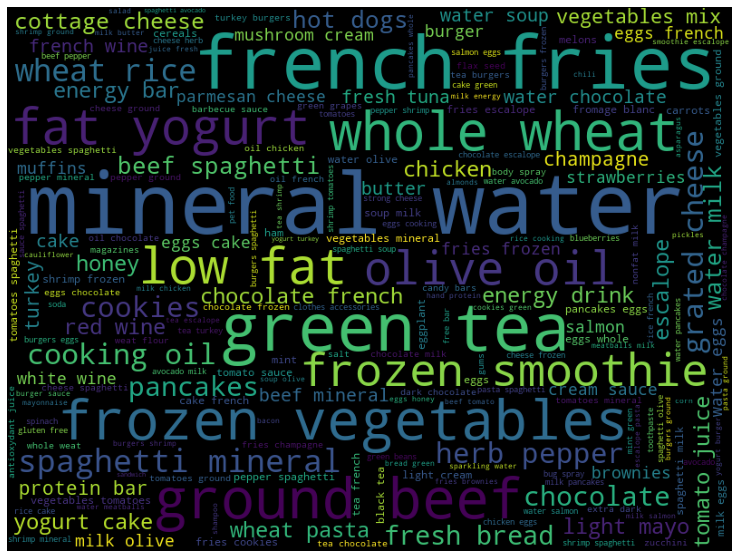

In [9]:
#物品的词云展示
wc = WordCloud(width = 800,height = 600)
img = wc.generate(item_content)
plt.figure(figsize = (15,10))
plt.imshow(img)
plt.axis('off')

(-0.5, 799.5, 599.5, -0.5)

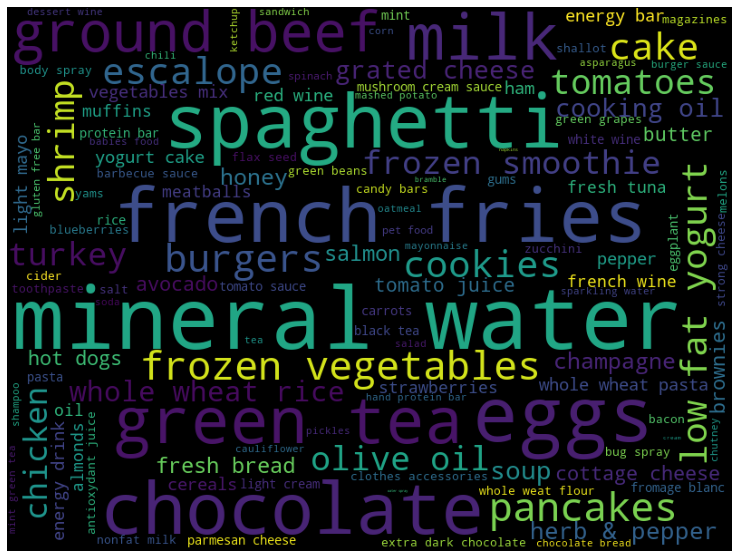

In [10]:
#按词频的词云展示
img = wc.generate_from_frequencies(item_nums)
plt.figure(figsize=(15,10))
plt.imshow(img)
plt.axis('off')

In [11]:
# 设置数据集
transactions = []
for i in range(data.shape[0]):
    temp_set = set()
    for j in range(data.shape[1]):
        if data.iloc[[i],[j]].values[0,0] != 'fill_item':
            temp_set.add(data.iloc[[i],[j]].values[0,0])
    #print(temp_set)
    #print(tuple(temp_set))
    transactions.append(tuple(temp_set))

In [12]:
print("交易记录：\n",transactions)

交易记录：
 [('vegetables mix', 'whole weat flour', 'salad', 'green grapes', 'mineral water', 'avocado', 'spinach', 'yams', 'green tea', 'almonds', 'energy drink', 'olive oil', 'salmon', 'shrimp', 'frozen smoothie', 'honey', 'cottage cheese', 'tomato juice', 'antioxydant juice', 'low fat yogurt'), ('eggs', 'burgers', 'meatballs'), ('chutney',), ('turkey', 'avocado'), ('green tea', 'milk', 'whole wheat rice', 'mineral water', 'energy bar'), ('low fat yogurt',), ('whole wheat pasta', 'french fries'), ('light cream', 'shallot', 'soup'), ('green tea', 'frozen vegetables', 'spaghetti'), ('french fries',), ('eggs', 'pet food'), ('cookies',), ('turkey', 'eggs', 'burgers', 'mineral water', 'cooking oil'), ('champagne', 'cookies', 'spaghetti'), ('salmon', 'mineral water'), ('mineral water',), ('honey', 'chocolate', 'chicken', 'cooking oil', 'shrimp', 'oil', 'low fat yogurt'), ('eggs', 'turkey'), ('tomatoes', 'black tea', 'turkey', 'spaghetti', 'eggs', 'mineral water', 'chicken', 'salmon', 'extra dar

In [14]:
# 挖掘频繁项集和关联规则
itemsets,rules = apriori(transactions,min_support = 0.01,min_confidence =0.5)
print('频繁项集：\n',itemsets)
print("*"*100)
print('关联规则：',rules)

频繁项集：
 {1: {('vegetables mix',): 193, ('mineral water',): 1788, ('avocado',): 250, ('yams',): 86, ('green tea',): 991, ('almonds',): 153, ('energy drink',): 200, ('olive oil',): 494, ('salmon',): 319, ('shrimp',): 536, ('frozen smoothie',): 475, ('honey',): 356, ('cottage cheese',): 239, ('tomato juice',): 228, ('low fat yogurt',): 574, ('eggs',): 1348, ('burgers',): 654, ('meatballs',): 157, ('turkey',): 469, ('milk',): 972, ('whole wheat rice',): 439, ('energy bar',): 203, ('whole wheat pasta',): 221, ('french fries',): 1282, ('light cream',): 117, ('soup',): 379, ('frozen vegetables',): 715, ('spaghetti',): 1306, ('cookies',): 603, ('cooking oil',): 383, ('champagne',): 351, ('chicken',): 450, ('chocolate',): 1229, ('oil',): 173, ('tomatoes',): 513, ('black tea',): 107, ('extra dark chocolate',): 90, ('fresh tuna',): 167, ('protein bar',): 139, ('pasta',): 118, ('red wine',): 211, ('pepper',): 199, ('rice',): 141, ('body spray',): 86, ('pancakes',): 713, ('ham',): 199, ('white wine'